Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.


Tarkib:

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.


Ustunlar:

Pregnancies: homilador bo'lish soni

Glucose: glyukozaga test natijasi

BloodPressure: diastolik qon bosimi (mm Hg)

SkinThickness: Triceps teri burmasining qalinligi (mm)

Insulin: 2 soatlik sarum insulini (mu U/ml)

BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)

DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi

Age: Yosh (yil)

Outcome: Class (0 - diabet yo'q, 1 - diabet)

In [6]:
import numpy as np
import pandas as pd

# kerakli Libraries yuklandi

In [4]:
URL = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv"

# Dataset yuklandi

'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv'

In [ ]:
df = pd.read_csv(URL)
df.head(10)

# dataframe 10 ta qatori chiqarildi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
df.shape

# dataset 9 ta ustun va 768 ta qatordan iborat

(768, 9)

In [11]:
df.info()

# Categorical ko'rinishidagi ustunimiz yo'q

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.isnull().sum()

# dataset not-null hisoblanadi

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df["Outcome"].value_counts()

# 500 ta diabeti mavjud va 268 ta diabeti mavjud bo'lmagan insonlar mavjud

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
correlation = df.corr().abs()
correlation.style.background_gradient(cmap = "coolwarm")

# df har bir ustuni uchun bog'liqlig darajasini tasvirda aniqlab olamiz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [25]:
corr_outcome = df.corrwith(df["Outcome"]).abs().sort_values(ascending = False)
corr_outcome

# Outcome (natija) ustuniga bog'liq bo'lgan ustunlarni tartibli chiqarib oldik
# ko'rinib turubdiki, df ichidagi ustunlar bir-biriga juda bog'liq emas ekan

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

Machine Learning uchun tayyorlaymiz

In [ ]:
X = df.drop("Outcome", axis = 1)
X.head(10)

# X-parametrlarni oldik

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [29]:
y = df["Outcome"]
y.head(10)

# y-label 

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

Machine Learning

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# train_set va test_set uchun ajratib olindi

(691, 8) (77, 8) (691,) (77,)


In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 14) # k = 14, chunki GridSearchCV eng yaxshi natija chiqaryapti

knn.fit(X_train, y_train)

# k-nn (k-nearest neighbors) model yaratildi

KNeighborsClassifier(n_neighbors=14)

In [62]:
y_predict = knn.predict(X_test)
y_predict

# X-parametrning test_set orqali y-label uchun bashorat qiymati olindi

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [63]:
asl_vs_bashorat = pd.DataFrame({
    "Asl natija" : y_test,
    "Bashorat natija" : y_predict
    })

asl_vs_bashorat.head(10)

# asl qiymat va bashorat qiymatlar bir o'rinda

,Asl natija,Bashorat natija
568,0,1
620,0,0
456,0,0
197,1,0
714,0,0
27,0,0
277,0,0
64,1,1
720,0,0
475,0,0


## Modelimizni Baholash

3 xil yo'l orqali aniqlandi:

- Jaccard_Score;

- classification_report;

- accuracy_score



Jaccard_score 

In [64]:
from sklearn.metrics import jaccard_score

j_score = jaccard_score(y_test, y_predict)

print(j_score * 100)

# bu usul orqali tekshirganimizda juda ham yomon natija hosil bo'ldi

31.25


Confusion Matrix

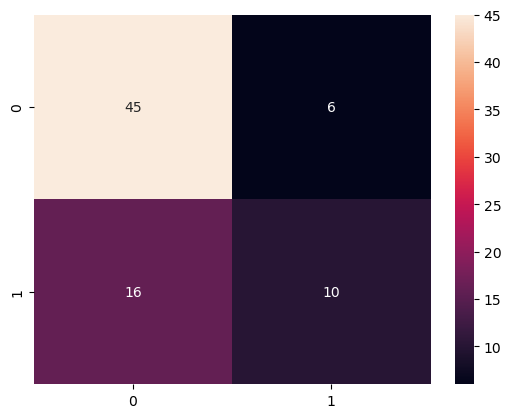

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [66]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_predict)

print(class_report)

# Confusion Matrix orqali tekshirish

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        51
           1       0.62      0.38      0.48        26

    accuracy                           0.71        77
   macro avg       0.68      0.63      0.64        77
weighted avg       0.70      0.71      0.69        77



Accuracy Score

In [67]:
from sklearn.metrics import accuracy_score

a_score = accuracy_score(y_test, y_predict)

print(a_score * 100)

71.42857142857143


## k-qo'shni sonini eng optimal yo'l bilan aniqlash
 

In [68]:
from sklearn.model_selection import GridSearchCV

gscv_for_k = GridSearchCV(knn, {"n_neighbors" : np.arange(1, 25)} , cv = 5)

gscv_for_k.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [56]:
gscv_for_k.cv_results_

{'mean_fit_time': array([0.04007897, 0.00579882, 0.0061965 , 0.00519667, 0.00579529,
        0.00619655, 0.00679607, 0.00719619, 0.00779452, 0.00539675,
        0.00599675, 0.00459638, 0.00539589, 0.00559587, 0.00499806,
        0.00639501, 0.00599647, 0.00679469, 0.00639529, 0.00519857,
        0.00499692, 0.00539737, 0.00699387, 0.00579596]),
 'std_fit_time': array([0.06761717, 0.00074801, 0.00116565, 0.00097858, 0.00116455,
        0.00116519, 0.00146873, 0.00132543, 0.00159996, 0.0008    ,
        0.00109545, 0.00048903, 0.00049008, 0.00101907, 0.00063203,
        0.00102029, 0.0008942 , 0.00116651, 0.00135558, 0.0007499 ,
        0.00063233, 0.00080065, 0.00209083, 0.00132558]),
 'mean_score_time': array([0.02612262, 0.01727028, 0.01668782, 0.01619053, 0.01630278,
        0.01898866, 0.01778879, 0.02118745, 0.02077694, 0.01572342,
        0.02784801, 0.01639056, 0.01722393, 0.0160594 , 0.01638999,
        0.01798992, 0.02078843, 0.02098775, 0.01858902, 0.01618943,
        0.016590

In [57]:
gscv_for_k.cv_results_['rank_test_score']

array([24, 23, 22, 21, 20, 19, 18,  6, 16, 11,  9,  3,  2,  1, 17, 15,  4,
        8,  5,  7, 12, 10, 13, 13])

In [58]:
gscv_for_k.best_params_

# k = 14

{'n_neighbors': 14}

In [60]:
best_result = gscv_for_k.best_score_

print(best_result * 100)

# k = 14 bo'lganda eng yaxshi natijani olamiz

75.78558696205755
